<a href="https://colab.research.google.com/github/Bidyutsharma/Data_MIning-Project/blob/main/project2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline



In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

In [ ]:
from sklearn.model_selection import train_test_split,cross_val_score

from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import plot_roc_curve

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/Data mining/Update-flag - Copy.csv")

In [ ]:
df


,Zone,Area,Population,Language,Religion,Bars,Stripes,Colours,Red,Green,Blue,Gold,White,Black,Orange,Circles,Crosses,Saltires,Quarters,Sunstars,Crescent,Triangle,Icon,Animate,Text,Landmass,justify_numeric
0,1,648,16,10,2,0,3,5,1,1,0,1,1,1,0,0,0,0,0,1,0,0,1,0,0,5,1
1,1,29,3,6,6,0,0,3,1,0,0,1,0,1,0,0,0,0,0,1,0,0,0,1,0,3,0
2,1,2388,20,8,2,2,0,3,1,1,0,0,1,0,0,0,0,0,0,1,1,0,0,0,0,4,0
3,3,0,0,1,1,0,0,5,1,0,1,1,1,0,1,0,0,0,0,0,0,1,1,1,0,6,0
4,1,0,0,6,0,3,0,3,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
189,3,3,0,1,1,0,0,3,1,0,1,0,1,0,0,0,0,0,1,5,0,0,0,0,0,6,0
190,1,256,22,6,6,0,3,4,1,0,1,1,1,0,0,0,0,0,0,1,0,0,0,0,0,3,0
191,2,905,28,10,5,0,0,4,1,1,0,1,0,0,1,1,0,0,0,0,0,0,1,1,0,4,0
192,2,753,6,10,5,3,0,4,1,1,0,0,0,1,1,0,0,0,0,0,0,0,0,1,0,4,0


In [ ]:
df.tail()

,Zone,Area,Population,Language,Religion,Bars,Stripes,Colours,Red,Green,Blue,Gold,White,Black,Orange,Circles,Crosses,Saltires,Quarters,Sunstars,Crescent,Triangle,Icon,Animate,Text,Landmass,justify_numeric
189,3,3,0,1,1,0,0,3,1,0,1,0,1,0,0,0,0,0,1,5,0,0,0,0,0,6,0
190,1,256,22,6,6,0,3,4,1,0,1,1,1,0,0,0,0,0,0,1,0,0,0,0,0,3,0
191,2,905,28,10,5,0,0,4,1,1,0,1,0,0,1,1,0,0,0,0,0,0,1,1,0,4,0
192,2,753,6,10,5,3,0,4,1,1,0,0,0,1,1,0,0,0,0,0,0,0,0,1,0,4,0
193,2,391,8,10,5,0,7,5,1,1,0,1,1,1,0,0,0,0,0,1,0,1,1,1,0,4,0


In [ ]:
df.head()

,Zone,Area,Population,Language,Religion,Bars,Stripes,Colours,Red,Green,Blue,Gold,White,Black,Orange,Circles,Crosses,Saltires,Quarters,Sunstars,Crescent,Triangle,Icon,Animate,Text,Landmass,justify_numeric
0,1,648,16,10,2,0,3,5,1,1,0,1,1,1,0,0,0,0,0,1,0,0,1,0,0,5,1
1,1,29,3,6,6,0,0,3,1,0,0,1,0,1,0,0,0,0,0,1,0,0,0,1,0,3,0
2,1,2388,20,8,2,2,0,3,1,1,0,0,1,0,0,0,0,0,0,1,1,0,0,0,0,4,0
3,3,0,0,1,1,0,0,5,1,0,1,1,1,0,1,0,0,0,0,0,0,1,1,1,0,6,0
4,1,0,0,6,0,3,0,3,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,3,0


In [ ]:
df.shape

(194, 27)

In [ ]:
df["Landmass"].value_counts()

4    52
5    39
3    35
1    31
6    20
2    17
Name: Landmass, dtype: int64

In [ ]:
df.isna().sum()

Zone               0
Area               0
Population         0
Language           0
Religion           0
Bars               0
Stripes            0
Colours            0
Red                0
Green              0
Blue               0
Gold               0
White              0
Black              0
Orange             0
Circles            0
Crosses            0
Saltires           0
Quarters           0
Sunstars           0
Crescent           0
Triangle           0
Icon               0
Animate            0
Text               0
Landmass           0
justify_numeric    0
dtype: int64

In [ ]:
df.describe()

,Zone,Area,Population,Language,Religion,Bars,Stripes,Colours,Red,Green,Blue,Gold,White,Black,Orange,Circles,Crosses,Saltires,Quarters,Sunstars,Crescent,Triangle,Icon,Animate,Text,Landmass,justify_numeric
count,194.000000,194.000000,194.000000,194.000000,194.000000,194.000000,194.000000,194.000000,194.000000,194.000000,194.000000,194.000000,194.000000,194.000000,194.000000,194.000000,194.000000,194.000000,194.000000,194.000000,194.000000,194.000000,194.000000,194.000000,194.000000,194.000000,194.000000
mean,2.211340,700.046392,23.268041,5.340206,2.190722,0.453608,1.551546,3.463918,0.788660,0.469072,0.510309,0.469072,0.752577,0.268041,0.134021,0.170103,0.149485,0.092784,0.149485,1.386598,0.056701,0.139175,0.252577,0.201031,0.082474,3.572165,0.201031
std,1.308274,2170.927932,91.934085,3.496517,2.061167,1.038339,2.328005,1.300154,0.409315,0.500334,0.501187,0.500334,0.432631,0.444085,0.341556,0.463075,0.385387,0.290879,0.435860,4.396186,0.231869,0.347025,0.435615,0.401808,0.275798,1.553018,0.401808
min,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,1.000000,9.000000,0.000000,2.000000,1.000000,0.000000,0.000000,3.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000,0.000000
50%,2.000000,111.000000,4.000000,6.000000,1.000000,0.000000,0.000000,3.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,0.000000
75%,4.000000,471.250000,14.000000,9.000000,4.000000,0.000000,3.000000,4.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.750000,0.000000,0.000000,5.000000,0.000000
max,4.000000,22402.000000,1008.000000,10.000000,7.000000,5.000000,14.000000,8.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,4.000000,2.000000,1.000000,4.000000,50.000000,1.000000,1.000000,1.000000,1.000000,1.000000,6.000000,1.000000


In [ ]:
pd.crosstab(df.Landmass,df.Religion)

Religion,0,1,2,3,4,5,6,7
Landmass,,,,,,,,
1,9,21,0,0,0,0,1,0
2,13,3,0,0,1,0,0,0
3,14,13,0,0,0,0,8,0
4,2,7,15,0,1,26,0,1
5,0,0,20,8,2,0,6,3
6,2,16,1,0,0,1,0,0


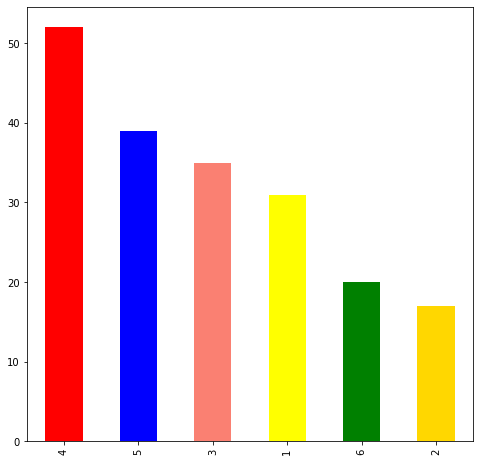

In [ ]:
df["Landmass"].value_counts().plot(figsize=(8,8), kind="bar", color=["red","blue","salmon","yellow","green","gold"])


Text(0.5, 1.0, 'flag freequency for religion')

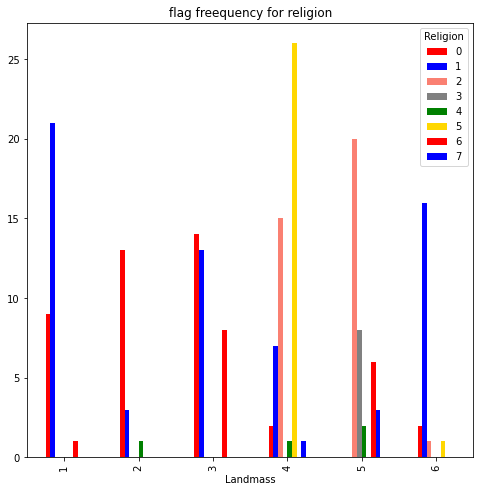

In [ ]:
pd.crosstab(df.Landmass,df.Religion).plot(figsize=(8,8), kind="bar", color=["red","blue","salmon","gray","green","gold"])
plt.title("flag freequency for religion")


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: UserWarning: The handle 'a' has a label of '_' which cannot be automatically added to the legend.
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: UserWarning: Legend does not support 'A' instances.
A proxy artist may be used instead.
See: http://matplotlib.org/users/legend_guide.html#creating-artists-specifically-for-adding-to-the-legend-aka-proxy-artists
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: UserWarning: Legend does not support 's' instances.
A proxy artist may be used instead.
See: http://matplotlib.org/users/legend_guide.html#creating-artists-specifically-for-adding-to-the-legend-aka-proxy-artists
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: UserWarning: Legend does not support 'i' ins

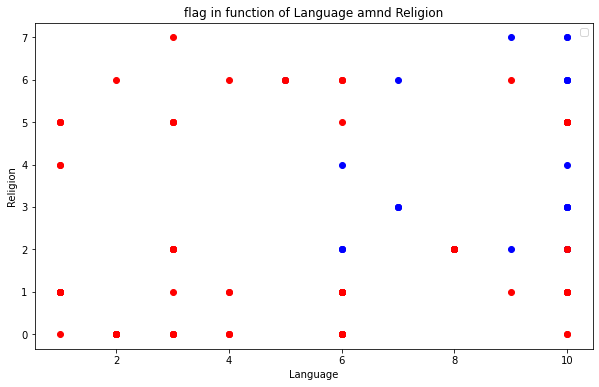

In [ ]:
plt.figure(figsize=(10,6))
plt.scatter(df.Language[df.justify_numeric==1],
            df.Religion[df.justify_numeric==1],
            color="blue")
plt.scatter(df.Language[df.justify_numeric==0],
            df.Religion[df.justify_numeric==0],
            color="red")
plt.title("flag in function of Language amnd Religion")
plt.xlabel("Language")
plt.ylabel("Religion")
plt.legend("Asian","Non_Asian")




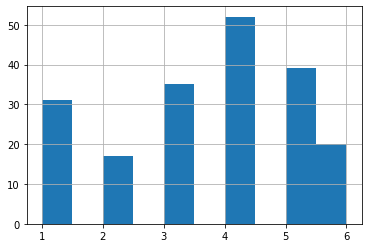

In [ ]:
df["Landmass"].hist()

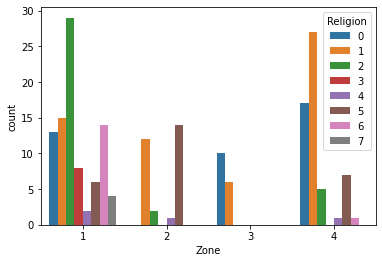

In [ ]:
sns.countplot(x='Zone',data=df,hue='Religion')

In [ ]:
X=df.drop("justify_numeric",axis=1)
Y=df["justify_numeric"]

In [ ]:
X

,Zone,Area,Population,Language,Religion,Bars,Stripes,Colours,Red,Green,Blue,Gold,White,Black,Orange,Circles,Crosses,Saltires,Quarters,Sunstars,Crescent,Triangle,Icon,Animate,Text,Landmass
0,1,648,16,10,2,0,3,5,1,1,0,1,1,1,0,0,0,0,0,1,0,0,1,0,0,5
1,1,29,3,6,6,0,0,3,1,0,0,1,0,1,0,0,0,0,0,1,0,0,0,1,0,3
2,1,2388,20,8,2,2,0,3,1,1,0,0,1,0,0,0,0,0,0,1,1,0,0,0,0,4
3,3,0,0,1,1,0,0,5,1,0,1,1,1,0,1,0,0,0,0,0,0,1,1,1,0,6
4,1,0,0,6,0,3,0,3,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
189,3,3,0,1,1,0,0,3,1,0,1,0,1,0,0,0,0,0,1,5,0,0,0,0,0,6
190,1,256,22,6,6,0,3,4,1,0,1,1,1,0,0,0,0,0,0,1,0,0,0,0,0,3
191,2,905,28,10,5,0,0,4,1,1,0,1,0,0,1,1,0,0,0,0,0,0,1,1,0,4
192,2,753,6,10,5,3,0,4,1,1,0,0,0,1,1,0,0,0,0,0,0,0,0,1,0,4


In [ ]:
Y

0      1
1      0
2      0
3      0
4      0
      ..
189    0
190    0
191    0
192    0
193    0
Name: justify_numeric, Length: 194, dtype: int64

In [ ]:
X_train,X_test,Y_train,Y_test =train_test_split(X,Y,test_size=0.2)

In [ ]:
X_train

,Zone,Area,Population,Language,Religion,Bars,Stripes,Colours,Red,Green,Blue,Gold,White,Black,Orange,Circles,Crosses,Saltires,Quarters,Sunstars,Crescent,Triangle,Icon,Animate,Text,Landmass
5,2,1247,7,10,5,0,2,3,1,0,0,1,0,1,0,0,0,0,0,1,0,0,1,0,0,4
135,3,407,3,2,0,0,3,6,1,1,1,1,1,1,0,1,0,0,0,1,0,0,1,1,1,2
122,4,0,0,6,1,0,1,3,1,0,1,0,1,0,0,0,0,0,0,6,0,0,0,0,0,1
167,1,185,10,8,2,0,3,4,1,1,0,0,1,1,0,0,0,0,0,2,0,0,0,0,0,5
85,4,70,3,1,0,3,0,3,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
106,1,0,0,10,2,0,0,3,1,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,5
14,1,143,90,6,2,0,0,2,1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,5
92,1,181,6,10,3,0,0,2,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,5
179,1,236,13,10,5,0,6,5,1,0,0,1,1,1,0,1,0,0,0,0,0,0,0,1,0,4


In [ ]:
X_train.shape

(155, 26)

In [ ]:
X_test.shape

(39, 26)

In [ ]:
models={"Logistic Regression": LogisticRegression(),
              "Naive Bayes": GaussianNB(),
              "KNN": KNeighborsClassifier(),
              "Random Forest":RandomForestClassifier()}
              
def fit_and_score(models, X_train, X_test, Y_train, Y_test):
   np.random.seed(42)
   model_scores= {}
   for name, model in models.items():

     model.fit(X_train, Y_train)
     model_scores[name]= model.score(X_test, Y_test)
   return model_scores
                   
                  
                  
             

                

                 
              

               

              


              

               
            

            


In [ ]:
model_scores=fit_and_score(models,X_train,X_test,Y_train,Y_test)
model_scores

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


{'KNN': 0.7692307692307693,
 'Logistic Regression': 0.8205128205128205,
 'Naive Bayes': 1.0,
 'Random Forest': 0.9743589743589743}